<a href="https://colab.research.google.com/github/ArchanaSahoo89/Logistic_Regression_Assignment/blob/main/Logistic_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Theoritical Questions & Answers:

    1. What is Logistic Regression, and how does it differ from Linear Regression?

Logistic Regression is a statistical method used for binary classification problems.
It predicts the probability that a given input point belongs to a certain class.
Unlike Linear Regression, which predicts continuous values, Logistic Regression outputs probabilities that are then mapped to binary outcomes (0 or 1) using a threshold (usually 0.5).


    2. What is the mathematical equation of Logistic Regression?

The logistic function (sigmoid function) is given by: [ P(Y=1|X) = \frac{1}{1 + e^{-(\beta_0 + \beta_1X_1 + \beta_2X_2 + ... + \beta_nX_n)}} ]
Here, (P(Y=1|X)) is the probability of the positive class, and (\beta_0, \beta_1, ..., \beta_n) are the coefficients.

    3. Why do we use the Sigmoid function in Logistic Regression?

The Sigmoid function maps any real-valued number into the range (0, 1), making it suitable for modeling probabilities.
It also has a nice derivative, which is useful for optimization during training.

     4. What is the cost function of Logistic Regression?

The cost function used in Logistic Regression is the log loss (binary cross-entropy): [ J(\beta) = -\frac{1}{m} \sum_{i=1}^{m} [y^{(i)} \log(h_\beta(x^{(i)})) + (1 - y^{(i)}) \log(1 - h_\beta(x^{(i)}))] ]
Where (h_\beta(x)) is the predicted probability.

    5. What is Regularization in Logistic Regression? Why is it needed?

Regularization is a technique used to prevent overfitting by adding a penalty term to the cost function.
It helps to keep the model simple and generalizes better to unseen data.

    6. Explain the difference between Lasso, Ridge, and Elastic Net regression.

Lasso (L1 Regularization): Adds a penalty equal to the absolute value of the coefficients. It can shrink some coefficients to zero, effectively performing feature selection.
Ridge (L2 Regularization): Adds a penalty equal to the square of the coefficients. It does not shrink coefficients to zero but reduces their magnitude.
Elastic Net: Combines both L1 and L2 penalties. It is useful when there are multiple features correlated with each other.

    7. When should we use Elastic Net instead of Lasso or Ridge?

We use Elastic Net when you have a large number of features, some of which are correlated.
It can provide a balance between Lasso and Ridge, allowing for both feature selection and coefficient shrinkage.

    8. What is the impact of the regularization parameter (λ) in Logistic Regression?

The regularization parameter controls the strength of the penalty.
A larger λ increases the penalty, leading to simpler models (more regularization), while a smaller λ allows for more complex models (less regularization).

    9. What are the key assumptions of Logistic Regression?

The dependent variable is binary.
The observations are independent.
There is a linear relationship between the logit of the outcome and the independent variables.
No multicollinearity among independent variables.


    10. What are some alternatives to Logistic Regression for classification tasks?

Alternatives include Decision Trees, Random Forests, Support Vector Machines (SVM), Gradient Boosting Machines, and Neural Networks.


    11. What are Classification Evaluation Metrics?

Common metrics include Accuracy, Precision, Recall, F1-Score, ROC-AUC, and Confusion Matrix.

    12. How does class imbalance affect Logistic Regression?

Class imbalance can lead to biased predictions towards the majority class.
It may result in high accuracy but poor performance on the minority class.


    13. What is Hyperparameter Tuning in Logistic Regression?

Hyperparameter tuning involves optimizing the parameters of the model (like regularization strength and penalty type) to improve model performance.


    14. What are different solvers in Logistic Regression? Which one should be used?

Common solvers include:
liblinear: Good for small datasets.
saga: Works well with large datasets and supports L1 and L2 regularization.
lbfgs: Good for large datasets and supports L2 regularization.
The choice of solver depends on the dataset size and the type of regularization.

    15. How is Logistic Regression extended for multiclass classification?

Logistic Regression can be extended using techniques like One-vs-Rest (OvR) or Softmax Regression (Multinomial Logistic Regression).


    16. What are the advantages and disadvantages of Logistic Regression?

Advantages: Simple to implement, interpretable, works well with linearly separable data, and efficient for binary classification.
Disadvantages: Assumes linearity between the independent variables and the log-odds, sensitive to outliers, and struggles with complex relationships.


    17. What are some use cases of Logistic Regression?

Use cases of Logistic Regression include spam detection, credit scoring, medical diagnosis, and customer churn prediction.

    18. What is the difference between Softmax Regression and Logistic Regression?

Softmax Regression is used for multiclass classification, while Logistic Regression is typically used for binary classification. Softmax outputs probabilities for multiple classes, while Logistic Regression outputs a single probability.

    19. How do we choose between One-vs-Rest (OvR) and Softmax for multiclass classification?

We use OvR when the classes are not mutually exclusive or when we have a large number of classes.
And we Use Softmax when classes are mutually exclusive.

    20. How do we interpret coefficients in Logistic Regression?

The coefficients represent the change in the log-odds of the outcome for a one-unit increase in the predictor variable, holding all other variables constant.

In [ ]:
# Practical Questions & Answers:

In [ ]:
# 1. Write a Python program that loads a dataset, splits it into training and testing sets, applies Logistic Regression, and prints the model accuracy.


import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Load dataset (using Iris dataset for demonstration)
data = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data',
                   header=None,
                   names=['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species'])

# Encode target variable
data['species'] = data['species'].astype('category').cat.codes

# Split dataset
X = data.drop('species', axis=1)
y = data['species']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Logistic Regression
model = LogisticRegression(max_iter=200)
model.fit(X_train, y_train)

# Predict and evaluate
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Model Accuracy: {accuracy:.2f}')

Model Accuracy: 1.00


In [28]:
# 2. Write a Python program to apply L1 regularization (Lasso) on a dataset using LogisticRegression(penalty='l1') and print the model accuracy.


# L1 Regularization (Lasso)
model_l1 = LogisticRegression(penalty='l1', solver='liblinear', max_iter=200)
model_l1.fit(X_train, y_train)

# Predict and evaluate
y_pred_l1 = model_l1.predict(X_test)
accuracy_l1 = accuracy_score(y_test, y_pred_l1)
print(f'L1 Regularization Model Accuracy: {accuracy_l1:.2f}')

L1 Regularization Model Accuracy: 0.83


In [29]:
# 3. Write a Python program to train Logistic Regression with L2 regularization (Ridge) using LogisticRegression(penalty='l2'). Print model accuracy and coefficients.


# L2 Regularization (Ridge)
model_l2 = LogisticRegression(penalty='l2', max_iter=200)
model_l2.fit(X_train, y_train)

# Predict and evaluate
y_pred_l2 = model_l2.predict(X_test)
accuracy_l2 = accuracy_score(y_test, y_pred_l2)
print(f'L2 Regularization Model Accuracy: {accuracy_l2:.2f}')
print(f'Coefficients: {model_l2.coef_}')

L2 Regularization Model Accuracy: 0.82
Coefficients: [[-1.03040105e+00  2.62999562e+00 -3.34256490e-02 -2.78684267e-01
  -1.66402901e-01  1.61316640e-03]]


In [30]:
# 4.  Write a Python program to train Logistic Regression with Elastic Net Regularization (penalty='elasticnet').


# Elastic Net Regularization
model_en = LogisticRegression(penalty='elasticnet', solver='saga', l1_ratio=0.5, max_iter=200)
model_en.fit(X_train, y_train)

# Predict and evaluate
y_pred_en = model_en.predict(X_test)
accuracy_en = accuracy_score(y_test, y_pred_en)
print(f'Elastic Net Model Accuracy: {accuracy_en:.2f}')

Elastic Net Model Accuracy: 0.70


In [31]:
# 5. Write a Python program to train a Logistic Regression model for multiclass classification using multi_class='ovr'.

# Multiclass classification using One-vs-Rest
model_ovr = LogisticRegression(multi_class='ovr', max_iter=200)
model_ovr.fit(X_train, y_train)

# Predict and evaluate
y_pred_ovr = model_ovr.predict(X_test)
accuracy_ovr = accuracy_score(y_test, y_pred_ovr)
print(f'One-vs-Rest Model Accuracy: {accuracy_ovr:.2f}')

One-vs-Rest Model Accuracy: 0.82


In [32]:
# 6. Write a Python program to apply GridSearchCV to tune the hyperparameters (C and penalty) of Logistic Regression. Print the best parameters and accuracy.


from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2', 'elasticnet'],
    'solver': ['liblinear', 'saga']
}

# Create a GridSearchCV object
grid_search = GridSearchCV(LogisticRegression(max_iter=200), param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Best parameters and accuracy
print(f'Best Parameters: {grid_search.best_params_}')
print(f'Best Cross-Validation Accuracy: {grid_search.best_score_:.2f}')

Best Parameters: {'C': 0.1, 'penalty': 'l2', 'solver': 'liblinear'}
Best Cross-Validation Accuracy: 0.79


In [33]:
# 7. Write a Python program to evaluate Logistic Regression using Stratified K-Fold Cross-Validation. Print the average accuracy.

from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score

# Stratified K-Fold Cross-Validation
skf = StratifiedKFold(n_splits=5)
accuracies = []

for train_index, test_index in skf.split(X, y):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    model_skf = LogisticRegression(max_iter=200)
    model_skf.fit(X_train, y_train)
    y_pred_skf = model_skf.predict(X_test)
    accuracies.append(accuracy_score(y_test, y_pred_skf))

print(f'Average Accuracy from Stratified K-Fold: {sum(accuracies) / len(accuracies):.2f}')

Average Accuracy from Stratified K-Fold: 0.78


In [34]:
# 8. Write a Python program to load a dataset from a CSV file, apply Logistic Regression, and evaluate its accuracy.


import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Load dataset from CSV file
# Make sure to provide the correct path to your CSV file
data = pd.read_csv("https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv")

# Display the first few rows of the dataset
print(data.head())

# Preprocess the dataset
# Convert categorical variables to numeric
data['Sex'] = data['Sex'].map({'male': 0, 'female': 1})

# Fill missing values
data['Age'].fillna(data['Age'].median(), inplace=True)
data['Embarked'].fillna('S', inplace=True)
data['Embarked'] = data['Embarked'].map({'C': 0, 'Q': 1, 'S': 2})

# Select features and target variable
# Using 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare' as features
X = data[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare']]
y = data['Survived']  # Target variable

# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Logistic Regression model
model = LogisticRegression(max_iter=200)
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

# Print results
print(f'Model Accuracy: {accuracy:.2f}')
print('Confusion Matrix:')
print(conf_matrix)
print('Classification Report:')
print(class_report)

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  
Mo

In [35]:
# 9. Write a Python program to apply RandomizedSearchCV for tuning hyperparameters (C, penalty, solver) in Logistic Regression. Print the best parameters and accuracy.

import numpy as np
import pandas as pd
import warnings
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler

# Suppress all warnings
warnings.filterwarnings("ignore")

# Load dataset (using Iris dataset as an example)
data = load_iris()
X = data.data
y = data.target

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Create a Logistic Regression model with increased max_iter
log_reg = LogisticRegression(max_iter=5000, solver='lbfgs', penalty='l2')

# Define valid solver-penalty combinations
valid_combinations = {
    'lbfgs': ['l2']
}

# Generate valid parameter grid
def generate_param_grid():
    param_grid = []
    C_values = np.logspace(-4, 4, 20)
    for solver, penalties in valid_combinations.items():
        for penalty in penalties:
            param = {'solver': [solver], 'penalty': [penalty], 'C': C_values}
            param_grid.append(param)
    return param_grid

param_dist = generate_param_grid()

# Set up RandomizedSearchCV
random_search = RandomizedSearchCV(
    estimator=log_reg,
    param_distributions=param_dist,
    n_iter=20,  # Reduced for efficiency
    scoring='accuracy',
    cv=5,  # 5-fold cross-validation
    verbose=1,
    random_state=42,
    n_jobs=-1,  # Use all available cores
    error_score='raise'  # Raise an error instead of setting NaN scores
)

# Fit the model
random_search.fit(X_train, y_train)

# Get the best parameters and best score
best_params = random_search.best_params_
best_score = random_search.best_score_

# Evaluate the model on the test set
y_pred = random_search.predict(X_test)
test_accuracy = accuracy_score(y_test, y_pred)

# Print the results
print("Best Parameters:", best_params)
print("Best Cross-Validation Accuracy:", best_score)
print("Test Set Accuracy:", test_accuracy)


Fitting 5 folds for each of 20 candidates, totalling 100 fits
Best Parameters: {'solver': 'lbfgs', 'penalty': 'l2', 'C': 1.623776739188721}
Best Cross-Validation Accuracy: 0.9583333333333334
Test Set Accuracy: 1.0


In [7]:
#10. Write a Python program to implement One-vs-One (OvO) Multiclass Logistic Regression and print accuracy.

from sklearn.multiclass import OneVsOneClassifier

# Train One-vs-One Logistic Regression
ovo_model = OneVsOneClassifier(LogisticRegression(max_iter=200))
ovo_model.fit(X_train, y_train)

# Predict and evaluate
y_pred_ovo = ovo_model.predict(X_test)
accuracy_ovo = accuracy_score(y_test, y_pred_ovo)
print(f'One-vs-One Model Accuracy: {accuracy_ovo:.2f}')

One-vs-One Model Accuracy: 1.00


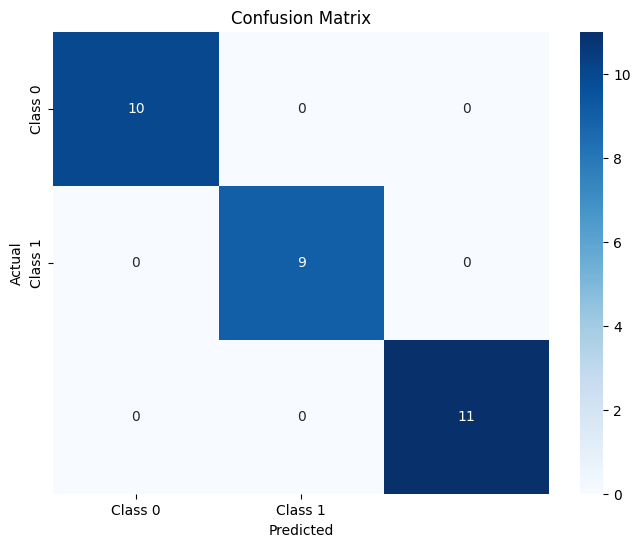

In [8]:
# 11. Write a Python program to train a Logistic Regression model and visualize the confusion matrix for binary classification.

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Train Logistic Regression
model = LogisticRegression(max_iter=200)
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plotting
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
# 12. Write a Python program to train a Logistic Regression model and evaluate its performance using Precision, Recall, and F1-Score.

from sklearn.metrics import precision_score, recall_score, f1_score

# Evaluate performance
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F1 Score: {f1:.2f}')


Precision: 0.81
Recall: 0.81
F1 Score: 0.81


In [9]:
# 13. Write a Python program to train a Logistic Regression model on imbalanced data and apply class weights to improve model performance.


from sklearn.datasets import make_classification

# Create imbalanced dataset
X_imbalanced, y_imbalanced = make_classification(n_classes=2, class_sep=2, weights=[0.9, 0.1], n_informative=3, n_redundant=1, flip_y=0, n_features=20, n_clusters_per_class=1, n_samples=1000, random_state=42)

# Split dataset
X_train_imb, X_test_imb, y_train_imb, y_test_imb = train_test_split(X_imbalanced, y_imbalanced, test_size=0.2, random_state=42)

# Train Logistic Regression with class weights
model_imb = LogisticRegression(class_weight='balanced', max_iter=200)
model_imb.fit(X_train_imb, y_train_imb)

# Predict and evaluate
y_pred_imb = model_imb.predict(X_test_imb)
accuracy_imb = accuracy_score(y_test_imb, y_pred_imb)
print(f'Imbalanced Model Accuracy: {accuracy_imb:.2f}')

Imbalanced Model Accuracy: 0.99


In [10]:
# 14. Write a Python program to train Logistic Regression on the Titanic dataset, handle missing values, and evaluate performance.


import numpy as np
import pandas as pd
import warnings
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Suppress all warnings
warnings.filterwarnings("ignore")

# Load the Titanic dataset
data_titanic = pd.read_csv("https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv")

# Preprocess the dataset
# Convert 'Sex' to numeric
data_titanic['Sex'] = data_titanic['Sex'].map({'male': 0, 'female': 1})

# Fill missing values
data_titanic['Age'].fillna(data_titanic['Age'].median(), inplace=True)
data_titanic['Embarked'].fillna('S', inplace=True)
data_titanic['Embarked'] = data_titanic['Embarked'].map({'C': 0, 'Q': 1, 'S': 2})

data_titanic['Fare'].fillna(data_titanic['Fare'].median(), inplace=True)

# Drop columns that won't be used for training
data_titanic.drop(['Name', 'Ticket', 'Cabin', 'PassengerId'], axis=1, inplace=True)

# Select features and target variable
X = data_titanic[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']]
y = data_titanic['Survived']

# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Logistic Regression model
model = LogisticRegression(max_iter=500, solver='lbfgs', penalty='l2')
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

# Print results
print(f'Model Accuracy: {accuracy:.2f}')
print('Confusion Matrix:')
print(conf_matrix)
print('Classification Report:')
print(class_report)



Model Accuracy: 0.81
Confusion Matrix:
[[90 15]
 [19 55]]
Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.86      0.84       105
           1       0.79      0.74      0.76        74

    accuracy                           0.81       179
   macro avg       0.81      0.80      0.80       179
weighted avg       0.81      0.81      0.81       179



In [11]:
# 15. Write a Python program to apply feature scaling (Standardization) before training a Logistic Regression model. Evaluate its accuracy and compare results with and without scaling.


import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler

# Load the Titanic dataset
data_titanic = pd.read_csv("https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv")

# Preprocess the dataset
data_titanic['Sex'] = data_titanic['Sex'].map({'male': 0, 'female': 1})
data_titanic['Age'].fillna(data_titanic['Age'].median(), inplace=True)
data_titanic['Embarked'].fillna('S', inplace=True)
data_titanic['Embarked'] = data_titanic['Embarked'].map({'C': 0, 'Q': 1, 'S': 2})
data_titanic.drop(['Name', 'Ticket', 'Cabin'], axis=1, inplace=True)

# Select features and target variable
X = data_titanic[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare']]
y = data_titanic['Survived']

# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Logistic Regression without scaling
model_no_scaling = LogisticRegression(max_iter=200)
model_no_scaling.fit(X_train, y_train)

# Predict and evaluate without scaling
y_pred_no_scaling = model_no_scaling.predict(X_test)
accuracy_no_scaling = accuracy_score(y_test, y_pred_no_scaling)

# Apply Standardization (Feature Scaling)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train Logistic Regression with scaling
model_with_scaling = LogisticRegression(max_iter=200)
model_with_scaling.fit(X_train_scaled, y_train)

# Predict and evaluate with scaling
y_pred_with_scaling = model_with_scaling.predict(X_test_scaled)
accuracy_with_scaling = accuracy_score(y_test, y_pred_with_scaling)

# Print results
print(f'Accuracy without scaling: {accuracy_no_scaling:.2f}')
print(f'Accuracy with scaling: {accuracy_with_scaling:.2f}')

Accuracy without scaling: 0.81
Accuracy with scaling: 0.80


ROC-AUC Score: 0.88


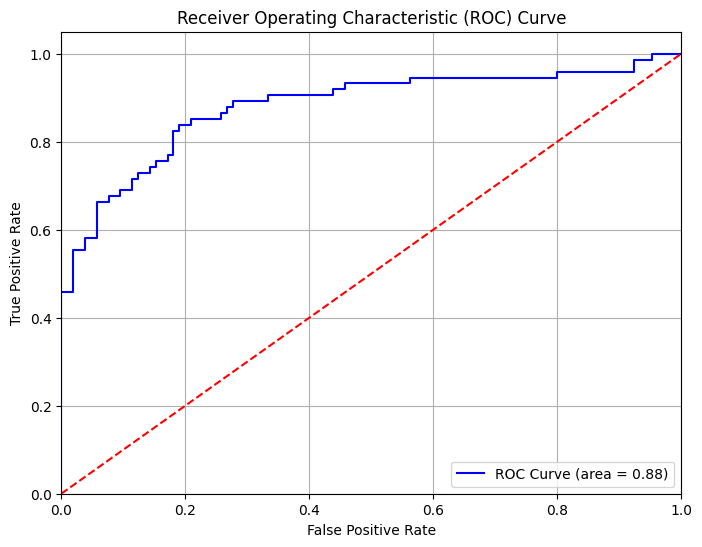

In [12]:
# 16. Write a Python program to train Logistic Regression and evaluate its performance using ROC-AUC score.


import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# Load the Titanic dataset
data_titanic = pd.read_csv("https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv")

# Preprocess the dataset
data_titanic['Sex'] = data_titanic['Sex'].map({'male': 0, 'female': 1})
data_titanic['Age'].fillna(data_titanic['Age'].median(), inplace=True)
data_titanic['Embarked'].fillna('S', inplace=True)
data_titanic['Embarked'] = data_titanic['Embarked'].map({'C': 0, 'Q': 1, 'S': 2})
data_titanic.drop(['Name', 'Ticket', 'Cabin'], axis=1, inplace=True)

# Select features and target variable
X = data_titanic[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare']]
y = data_titanic['Survived']

# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Logistic Regression model
model = LogisticRegression(max_iter=200)
model.fit(X_train, y_train)

# Predict probabilities on the test set
y_pred_proba = model.predict_proba(X_test)[:, 1]  # Get probabilities for the positive class

# Calculate ROC-AUC score
roc_auc = roc_auc_score(y_test, y_pred_proba)
print(f'ROC-AUC Score: {roc_auc:.2f}')

# Plot ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label='ROC Curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='red', linestyle='--')  # Diagonal line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid()
plt.show()

In [21]:
# 17. Write a Python program to train Logistic Regression using a custom learning rate (C=0.5) and evaluate accuracy.


import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Load the Titanic dataset
data_titanic = pd.read_csv("https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv")

# Preprocess the dataset
data_titanic['Sex'] = data_titanic['Sex'].map({'male': 0, 'female': 1})
data_titanic['Age'].fillna(data_titanic['Age'].median(), inplace=True)
data_titanic['Embarked'].fillna('S', inplace=True)
data_titanic['Embarked'] = data_titanic['Embarked'].map({'C': 0, 'Q': 1, 'S': 2})
data_titanic.drop(['Name', 'Ticket', 'Cabin'], axis=1, inplace=True)

# Select features and target variable
X = data_titanic[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare']]
y = data_titanic['Survived']

# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Logistic Regression model with custom learning rate (C=0.5)
model = LogisticRegression(C=0.5, max_iter=200)
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Evaluate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Model Accuracy with C=0.5: {accuracy:.2f}')

Model Accuracy with C=0.5: 0.81


In [13]:
# 18. Write a Python program to train Logistic Regression and identify important features based on model coefficients.


import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import numpy as np

# Load the Titanic dataset
data_titanic = pd.read_csv("https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv")

# Preprocess the dataset
data_titanic['Sex'] = data_titanic['Sex'].map({'male': 0, 'female': 1})
data_titanic['Age'].fillna(data_titanic['Age'].median(), inplace=True)
data_titanic['Embarked'].fillna('S', inplace=True)
data_titanic['Embarked'] = data_titanic['Embarked'].map({'C': 0, 'Q': 1, 'S': 2})
data_titanic.drop(['Name', 'Ticket', 'Cabin'], axis=1, inplace=True)

# Select features and target variable
X = data_titanic[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare']]
y = data_titanic['Survived']

# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Logistic Regression model
model = LogisticRegression(max_iter=200)
model.fit(X_train, y_train)

# Get the coefficients of the model
coefficients = model.coef_[0]
feature_names = X.columns

# Create a DataFrame to display feature importance
feature_importance = pd.DataFrame({'Feature': feature_names, 'Coefficient': coefficients})
feature_importance['Importance'] = np.abs(feature_importance['Coefficient'])  # Use absolute value for importance
feature_importance = feature_importance.sort_values(by='Importance', ascending=False)

# Print the feature importance
print("Feature Importance based on model coefficients:")
print(feature_importance)

# Optionally, you can also print the accuracy of the model
accuracy = model.score(X_test, y_test)
print(f'Model Accuracy: {accuracy:.2f}')

Feature Importance based on model coefficients:
  Feature  Coefficient  Importance
1     Sex     2.610552    2.610552
0  Pclass    -0.928176    0.928176
3   SibSp    -0.315760    0.315760
4   Parch    -0.125206    0.125206
2     Age    -0.031450    0.031450
5    Fare     0.003434    0.003434
Model Accuracy: 0.81


In [14]:
# 19. Write a Python program to train Logistic Regression and evaluate its performance using Cohen’s Kappa Score.


import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import cohen_kappa_score, accuracy_score

# Load the Titanic dataset
data_titanic = pd.read_csv("https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv")

# Preprocess the dataset
data_titanic['Sex'] = data_titanic['Sex'].map({'male': 0, 'female': 1})
data_titanic['Age'].fillna(data_titanic['Age'].median(), inplace=True)
data_titanic['Embarked'].fillna('S', inplace=True)
data_titanic['Embarked'] = data_titanic['Embarked'].map({'C': 0, 'Q': 1, 'S': 2})
data_titanic.drop(['Name', 'Ticket', 'Cabin'], axis=1, inplace=True)

# Select features and target variable
X = data_titanic[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare']]
y = data_titanic['Survived']

# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Logistic Regression model
model = LogisticRegression(max_iter=200)
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Evaluate accuracy
accuracy = accuracy_score(y_test, y_pred)
kappa_score = cohen_kappa_score(y_test, y_pred)

# Print results
print(f'Model Accuracy: {accuracy:.2f}')
print(f'Cohen’s Kappa Score: {kappa_score:.2f}')


Model Accuracy: 0.81
Cohen’s Kappa Score: 0.60


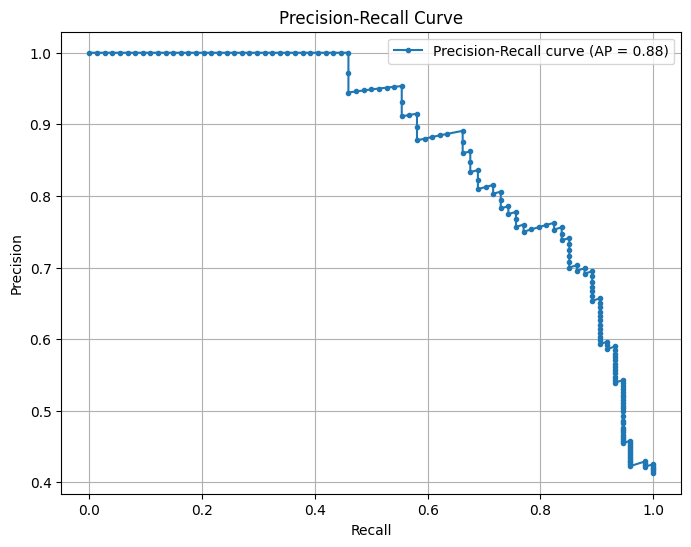

In [15]:
# 20. Write a Python program to train Logistic Regression and visualize the Precision-Recall Curve for binary classification.


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_recall_curve, average_precision_score

# Load the Titanic dataset
data_titanic = pd.read_csv("https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv")

# Preprocess the dataset
data_titanic['Sex'] = data_titanic['Sex'].map({'male': 0, 'female': 1})
data_titanic['Age'].fillna(data_titanic['Age'].median(), inplace=True)
data_titanic['Embarked'].fillna('S', inplace=True)
data_titanic['Embarked'] = data_titanic['Embarked'].map({'C': 0, 'Q': 1, 'S': 2})
data_titanic.drop(['Name', 'Ticket', 'Cabin'], axis=1, inplace=True)

# Select features and target variable
X = data_titanic[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare']]
y = data_titanic['Survived']

# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Logistic Regression model
model = LogisticRegression(max_iter=200)
model.fit(X_train, y_train)

# Predict probabilities on the test set
y_scores = model.predict_proba(X_test)[:, 1]  # Get probabilities for the positive class

# Calculate precision and recall
precision, recall, _ = precision_recall_curve(y_test, y_scores)
average_precision = average_precision_score(y_test, y_scores)

# Plot Precision-Recall Curve
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, marker='.', label='Precision-Recall curve (AP = {:.2f})'.format(average_precision))
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.grid()
plt.show()

In [16]:
# 21. Write a Python program to train Logistic Regression with different solvers (liblinear, saga, lbfgs) and compare their accuracy.


import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Load the Titanic dataset
data_titanic = pd.read_csv("https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv")

# Preprocess the dataset
data_titanic['Sex'] = data_titanic['Sex'].map({'male': 0, 'female': 1})
data_titanic['Age'].fillna(data_titanic['Age'].median(), inplace=True)
data_titanic['Embarked'].fillna('S', inplace=True)
data_titanic['Embarked'] = data_titanic['Embarked'].map({'C': 0, 'Q': 1, 'S': 2})
data_titanic.drop(['Name', 'Ticket', 'Cabin'], axis=1, inplace=True)

# Select features and target variable
X = data_titanic[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare']]
y = data_titanic['Survived']

# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# List of solvers to compare
solvers = ['liblinear', 'saga', 'lbfgs']
accuracies = {}

# Train Logistic Regression with different solvers and evaluate accuracy
for solver in solvers:
    model = LogisticRegression(solver=solver, max_iter=200)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    accuracies[solver] = accuracy
    print(f'Accuracy with solver "{solver}": {accuracy:.2f}')

# Print all accuracies
print("\nAccuracy comparison for different solvers:")
for solver, accuracy in accuracies.items():
    print(f'Solver: {solver}, Accuracy: {accuracy:.2f}')

Accuracy with solver "liblinear": 0.79
Accuracy with solver "saga": 0.68
Accuracy with solver "lbfgs": 0.81

Accuracy comparison for different solvers:
Solver: liblinear, Accuracy: 0.79
Solver: saga, Accuracy: 0.68
Solver: lbfgs, Accuracy: 0.81


In [17]:
# 22.  Write a Python program to train Logistic Regression and evaluate its performance using Matthews Correlation Coefficient (MCC).


import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import matthews_corrcoef, accuracy_score

# Load the Titanic dataset
data_titanic = pd.read_csv("https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv")

# Preprocess the dataset
data_titanic['Sex'] = data_titanic['Sex'].map({'male': 0, 'female': 1})
data_titanic['Age'].fillna(data_titanic['Age'].median(), inplace=True)
data_titanic['Embarked'].fillna('S', inplace=True)
data_titanic['Embarked'] = data_titanic['Embarked'].map({'C': 0, 'Q': 1, 'S': 2})
data_titanic.drop(['Name', 'Ticket', 'Cabin'], axis=1, inplace=True)

# Select features and target variable
X = data_titanic[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare']]
y = data_titanic['Survived']

# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Logistic Regression model
model = LogisticRegression(max_iter=200)
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Evaluate accuracy and Matthews Correlation Coefficient
accuracy = accuracy_score(y_test, y_pred)
mcc = matthews_corrcoef(y_test, y_pred)

# Print results
print(f'Model Accuracy: {accuracy:.2f}')
print(f'Matthews Correlation Coefficient (MCC): {mcc:.2f}')

Model Accuracy: 0.81
Matthews Correlation Coefficient (MCC): 0.60


In [18]:
# 23. Write a Python program to train Logistic Regression on both raw and standardized data. Compare their accuracy to see the impact of feature scaling.


import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler

# Load the Titanic dataset
data_titanic = pd.read_csv("https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv")

# Preprocess the dataset
data_titanic['Sex'] = data_titanic['Sex'].map({'male': 0, 'female': 1})
data_titanic['Age'].fillna(data_titanic['Age'].median(), inplace=True)
data_titanic['Embarked'].fillna('S', inplace=True)
data_titanic['Embarked'] = data_titanic['Embarked'].map({'C': 0, 'Q': 1, 'S': 2})
data_titanic.drop(['Name', 'Ticket', 'Cabin'], axis=1, inplace=True)

# Select features and target variable
X = data_titanic[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare']]
y = data_titanic['Survived']

# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Logistic Regression on raw data
model_raw = LogisticRegression(max_iter=200)
model_raw.fit(X_train, y_train)

# Predict and evaluate accuracy on raw data
y_pred_raw = model_raw.predict(X_test)
accuracy_raw = accuracy_score(y_test, y_pred_raw)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train Logistic Regression on standardized data
model_scaled = LogisticRegression(max_iter=200)
model_scaled.fit(X_train_scaled, y_train)

# Predict and evaluate accuracy on standardized data
y_pred_scaled = model_scaled.predict(X_test_scaled)
accuracy_scaled = accuracy_score(y_test, y_pred_scaled)

# Print results
print(f'Accuracy on raw data: {accuracy_raw:.2f}')
print(f'Accuracy on standardized data: {accuracy_scaled:.2f}')


Accuracy on raw data: 0.81
Accuracy on standardized data: 0.80


In [19]:
# 24. Write a Python program to train Logistic Regression and find the optimal C (regularization strength) using cross-validation.


import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Load the Titanic dataset
data_titanic = pd.read_csv("https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv")

# Preprocess the dataset
data_titanic['Sex'] = data_titanic['Sex'].map({'male': 0, 'female': 1})
data_titanic['Age'].fillna(data_titanic['Age'].median(), inplace=True)
data_titanic['Embarked'].fillna('S', inplace=True)
data_titanic['Embarked'] = data_titanic['Embarked'].map({'C': 0, 'Q': 1, 'S': 2})
data_titanic.drop(['Name', 'Ticket', 'Cabin'], axis=1, inplace=True)

# Select features and target variable
X = data_titanic[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare']]
y = data_titanic['Survived']

# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the parameter grid for C
param_grid = {'C': [0.01, 0.1, 1, 10, 100]}

# Create a Logistic Regression model
model = LogisticRegression(max_iter=200)

# Create a GridSearchCV object
grid_search = GridSearchCV(model, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Get the best parameters and the best score
best_C = grid_search.best_params_['C']
best_score = grid_search.best_score_

# Predict on the test set using the best model
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

# Evaluate accuracy on the test set
accuracy = accuracy_score(y_test, y_pred)

# Print results
print(f'Optimal C: {best_C}')
print(f'Best Cross-Validation Accuracy: {best_score:.2f}')
print(f'Test Set Accuracy: {accuracy:.2f}')




Optimal C: 0.1
Best Cross-Validation Accuracy: 0.79
Test Set Accuracy: 0.82


In [20]:
# 25. Write a Python program to train Logistic Regression, save the trained model using joblib, and load it again to make predictions.


import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import joblib

# Load the Titanic dataset
data_titanic = pd.read_csv("https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv")

# Preprocess the dataset
data_titanic['Sex'] = data_titanic['Sex'].map({'male': 0, 'female': 1})
data_titanic['Age'].fillna(data_titanic['Age'].median(), inplace=True)
data_titanic['Embarked'].fillna('S', inplace=True)
data_titanic['Embarked'] = data_titanic['Embarked'].map({'C': 0, 'Q': 1, 'S': 2})
data_titanic.drop(['Name', 'Ticket', 'Cabin'], axis=1, inplace=True)

# Select features and target variable
X = data_titanic[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare']]
y = data_titanic['Survived']

# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Logistic Regression model
model = LogisticRegression(max_iter=200)
model.fit(X_train, y_train)

# Save the trained model using joblib
joblib.dump(model, 'logistic_regression_model.joblib')

# Load the model back
loaded_model = joblib.load('logistic_regression_model.joblib')

# Make predictions using the loaded model
y_pred = loaded_model.predict(X_test)

# Evaluate accuracy on the test set
accuracy = accuracy_score(y_test, y_pred)

# Print results
print(f'Test Set Accuracy: {accuracy:.2f}')

Test Set Accuracy: 0.81
